In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import joblib 
import os 
data=pd.read_csv("medical_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [12]:

data['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
data.shape

(2772, 7)

In [15]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [79]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
duplicates=data.duplicated().sum()

In [81]:
data.shape

(2772, 7)

In [82]:
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 1435


In [17]:
data=data.drop_duplicates()

In [84]:
data.duplicated().sum()

0

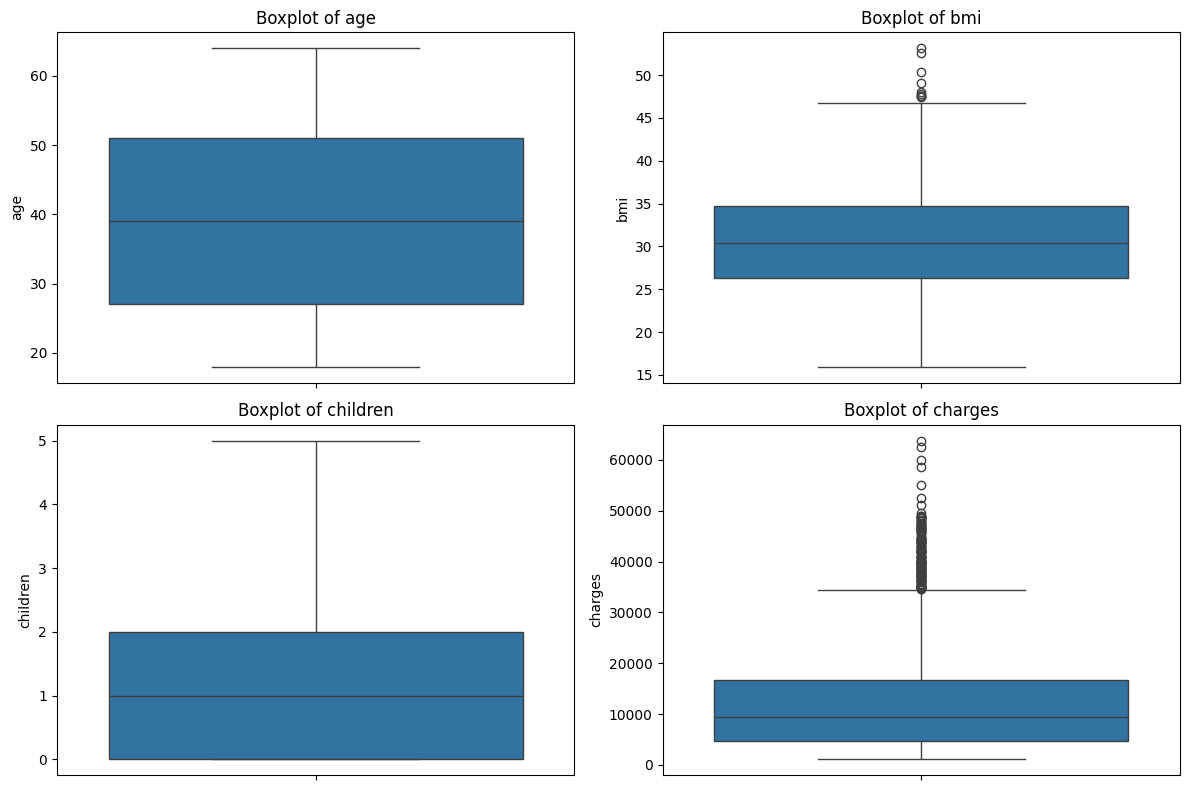

In [18]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [86]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column to remove outliers
for col in numerical_columns:
    data = remove_outliers(data, col)

In [19]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max     

In [88]:
data.shape

(1190, 7)

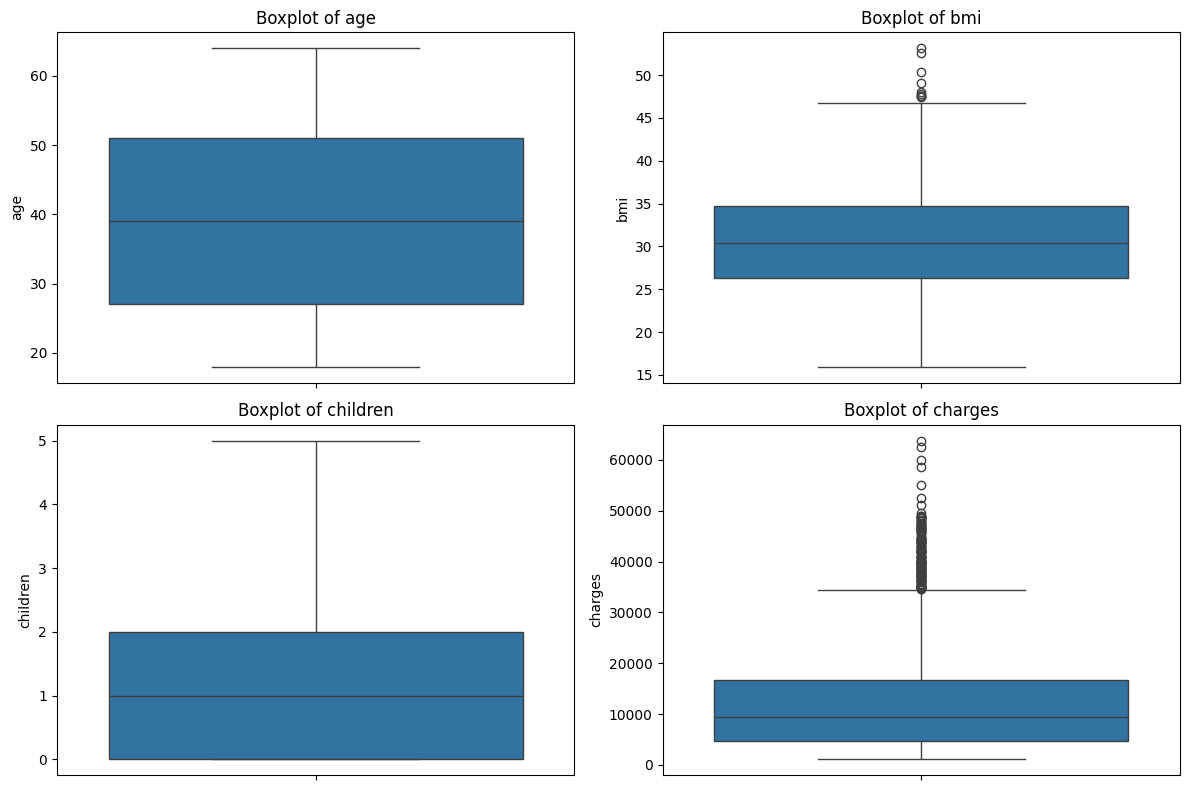

In [20]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

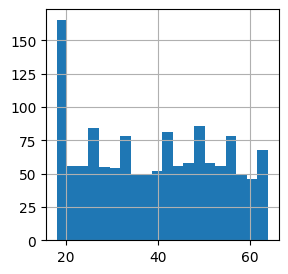

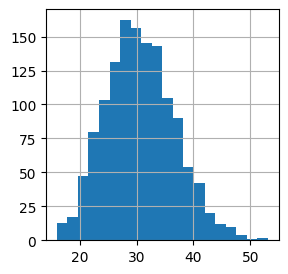

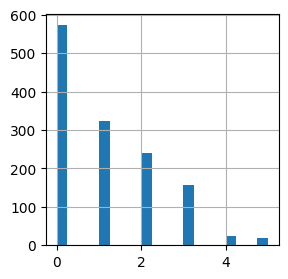

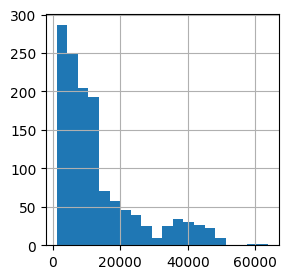

In [21]:
varquanti=['age','bmi', 'children', 'charges']
for col in varquanti:
    data[col].hist(bins=20,figsize=(3,3))
    plt.show()


In [23]:
data.loc[:, 'charges'] = np.log(data['charges'] + 1)
data.loc[:, 'age'] = np.log(data['age'] + 1)
data.loc[:, 'children'] = np.log(data['children'] + 1)

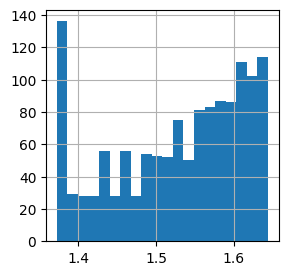

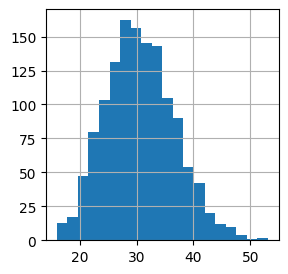

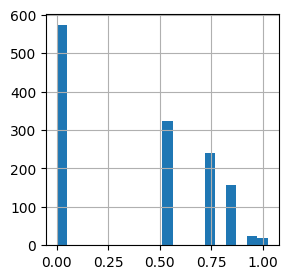

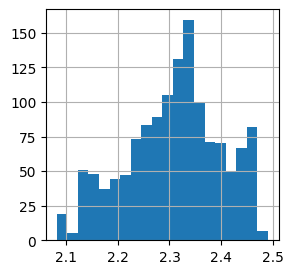

In [24]:
varquanti=['age','bmi', 'children', 'charges']
for col in varquanti:
    data[col].hist(bins=20,figsize=(3,3))
    plt.show()

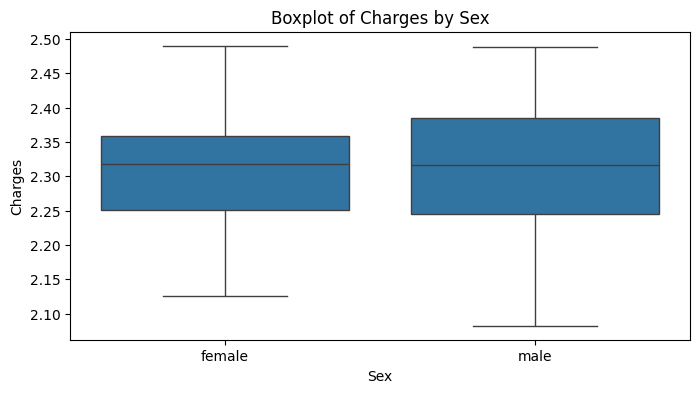

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Boxplot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [27]:
y = data["charges"]
x = data.drop(["charges"], axis=1)

In [28]:
x_encoded = pd.get_dummies(x, columns=['sex', 'smoker', 'region'], drop_first=True)

In [29]:
x_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.385227,27.900,0.000000,False,True,False,False,True
1,1.372307,33.770,0.526589,True,False,False,True,False
2,1.474144,33.000,0.869742,True,False,False,True,False
3,1.509918,22.705,0.000000,True,False,True,False,False
4,1.503301,28.880,0.000000,True,False,True,False,False


In [30]:
binary_data=x_encoded[["smoker_yes","sex_male","region_northwest","region_southeast","region_southwest"]]
non_binary_data=x_encoded.drop(columns=["smoker_yes", "sex_male", "region_northwest", "region_southeast", "region_southwest"])

In [31]:
Scaler=StandardScaler()
xs=Scaler.fit_transform(non_binary_data) 
xs_scaled=pd.DataFrame(xs,columns=non_binary_data.columns,index=non_binary_data.index)
xs_scaled.head()

,age,bmi,children
0,-1.716124,-0.453160,-1.092737
1,-1.870949,0.509422,0.365649
2,-0.650612,0.383155,1.316009
3,-0.221923,-1.305052,-1.092737
4,-0.301218,-0.292456,-1.092737


In [32]:
joblib.dump(Scaler,"scaler.pkl")

['scaler.pkl']

In [33]:
Xs_final = pd.concat([xs_scaled, binary_data], axis=1)
print(Xs_final.head())

        age       bmi  children  smoker_yes  sex_male  region_northwest  \
0 -1.716124 -0.453160 -1.092737        True     False             False   
1 -1.870949  0.509422  0.365649       False      True             False   
2 -0.650612  0.383155  1.316009       False      True             False   
3 -0.221923 -1.305052 -1.092737       False      True              True   
4 -0.301218 -0.292456 -1.092737       False      True              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [34]:
x_train, x_test,y_train,y_test=train_test_split(Xs_final,y,test_size=0.2,random_state=123)

In [35]:
print(x_train.shape)
print(x_test.shape)

(1069, 8)
(268, 8)


In [41]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [42]:
Xs_final.columns

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [43]:
model1.coef_

array([ 0.05034364,  0.00732013,  0.0110563 ,  0.14827609, -0.00880732,
       -0.00756824, -0.01580036, -0.01457686])

In [44]:
model1.intercept_

np.float64(2.292743840636921)

In [45]:
pred=model1.predict(x_test)
MSE=mean_squared_error(pred,y_test)
print(MSE)

0.0017293557113341091


Text(0, 0.5, 'predicted values')

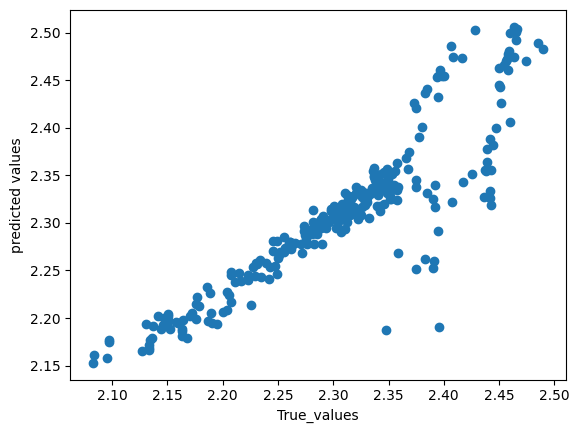

In [46]:
plt.scatter(y_test,pred)
plt.xlabel("True_values")
plt.ylabel("predicted values")

In [47]:
model2=Ridge()

In [51]:
# Préciser les valeurs de lambda à tester 
nb_va=300
# donne des valeurs entre 10^(-3) et 10^(2)
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [52]:
model2=Ridge()

In [56]:
grid1=GridSearchCV(model2,lambda_range,scoring="neg_mean_squared_error",
                  cv=5)

In [57]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [58]:
grid1.best_params_

{'alpha': np.float64(0.1055386103036523)}

In [59]:
model1=Ridge(alpha=0.1055386103036523)
model1.fit(x_train,y_train)

Ridge(alpha=0.1055386103036523)

In [60]:
print(x_train.columns)
print(model1.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.05033861  0.0073175   0.01105509  0.14818477 -0.00879721 -0.00755062
 -0.01577351 -0.01455735]


In [61]:
print(model1.intercept_)

2.2927412342794478


In [62]:
pred2=model1.predict(x_test)
MSE=mean_squared_error(pred2,y_test)
R2_score=r2_score(pred2,y_test)
print(MSE.round(2))
print(R2_score)

0.0
0.7337385504737683


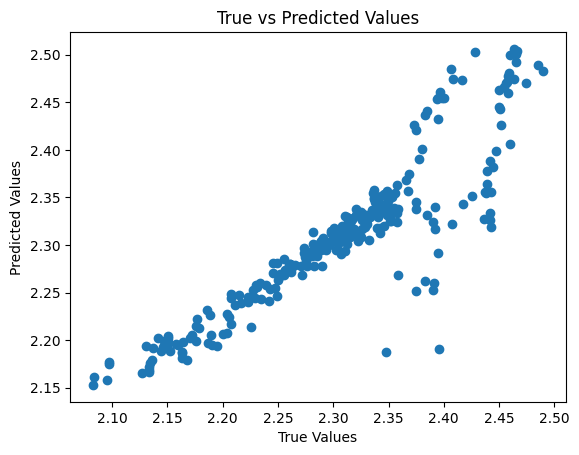

In [63]:
plt.scatter(y_test, pred2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [64]:
nb_va=300
lambda_values2=np.logspace(-3,2,nb_va)
lambda_range2={"alpha":lambda_values2}

In [73]:
model3=Lasso()
grid2=GridSearchCV(model3,lambda_range2,scoring='neg_mean_squared_error',cv=5)
grid2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [74]:
grid2.best_params_

{'alpha': np.float64(0.001)}

In [75]:
model3=Lasso(alpha=0.001)
model3.fit(x_train,y_train)

Lasso(alpha=0.001)

In [76]:
print(x_train.columns)
print(model3.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.04979243  0.00506676  0.00991231  0.14138007 -0.00420481  0.
 -0.0024705  -0.00209042]


In [77]:
print(model3.intercept_)

2.2833687631839825


In [78]:
pred3=model3.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

0.0
0.7033522349910185


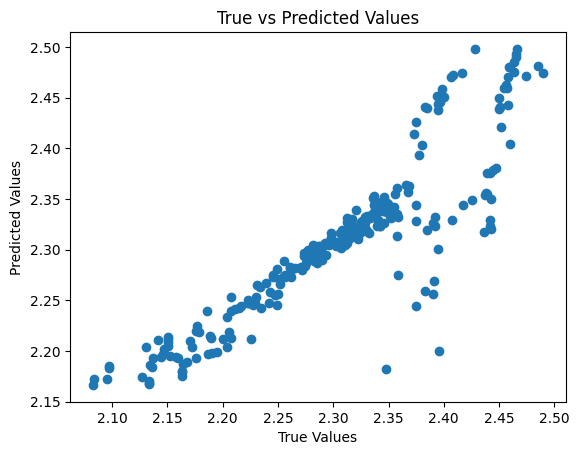

In [79]:
plt.scatter(y_test, pred3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [80]:
nb_val=300 # nbr de valeurs à tester 
lambda_range3=np.logspace(-3,2,nb_val) # valeurs de lambda à tester
rho_range=[0.1,0.01,0.001]    # valeurs de rho à tester  
hpers={"alpha":lambda_range3,"l1_ratio":rho_range} 

In [81]:
model4=ElasticNet()
grid3=GridSearchCV(model4,hpers,cv=5,scoring="neg_mean_squared_error")

In [82]:
grid3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-...
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02]),
                         'l1_ratio': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [83]:
grid3.best_params_

{'alpha': np.float64(0.001), 'l1_ratio': 0.001}

In [84]:
model4=ElasticNet(alpha=0.001,l1_ratio=0.001)

In [85]:
model4.fit(x_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [86]:
print(model4.coef_)
print(model4.intercept_)

[ 0.05029228  0.0072916   0.01104284  0.14735046 -0.00870113 -0.0073765
 -0.01551467 -0.01436567]
2.292705373116805


In [87]:
pred4=model4.predict(x_test)
MSE=mean_squared_error(pred4,y_test)
R2_score=r2_score(pred4,y_test)
MSE.round(2)
print(MSE)
R2_score

0.001731777418718429


0.7315221778589917

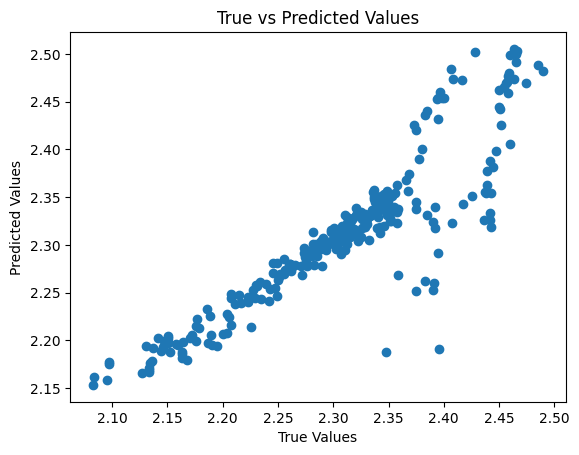

In [88]:
plt.scatter(y_test, pred4)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [90]:
joblib.dump(model4, 'ELN_model.pkl')

['ELN_model.pkl']

In [91]:
scaler = joblib.load('scaler.pkl')
scaler.feature_names_in_

array(['age', 'bmi', 'children'], dtype=object)